In [1]:
import os
import gzip
import shutil
import numpy as np
from mlxtend.data import loadlocal_mnist
from keras.layers import Flatten, Input, Conv2D, MaxPool2D, Dense
from keras.optimizers import Adam
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import time
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
def precision(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fp)
    
def recall(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fn)

def accuracy_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp+tn)/(tp+tn+fp+fn)
def tp_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return tp,fn,fp,tn

In [3]:
data_source = "MNIST Digit/Train"
data_temp = "MNIST/Train"
data_store = "MNIST/Train"

In [4]:
c_list = os.listdir(data_source)
print(c_list)

['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz']


In [5]:
if os.path.isdir(data_temp):
    shutil.rmtree(data_temp)
    os.makedirs(data_temp)
else:
    os.makedirs(data_temp)

In [6]:
if os.path.isdir(data_store):
    shutil.rmtree(data_store)
    os.makedirs(data_store)
else:
    os.makedirs(data_store)

In [7]:
for c_l in c_list:
    with gzip.open(data_source+'/'+c_l, 'rb') as f_in:
        with open(data_temp+'/'+c_l[:(c_l.find('.gz'))], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [8]:
c_list = os.listdir(data_temp)
print(c_list)
train_image, train_label = loadlocal_mnist(images_path=data_temp+'/'+'train-images-idx3-ubyte', labels_path=data_temp+'/'+'train-labels-idx1-ubyte')

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


In [9]:
train_image=np.expand_dims(train_image, axis=2)
train_image = np.reshape(train_image, (-1,28,28))
train_image=np.expand_dims(train_image, axis=3)
print(train_image.shape)
onehot_encoder = OneHotEncoder(sparse=False)
train_label = onehot_encoder.fit_transform(np.expand_dims(train_label,axis=1))
print(train_label.shape)

(60000, 28, 28, 1)
(60000, 10)


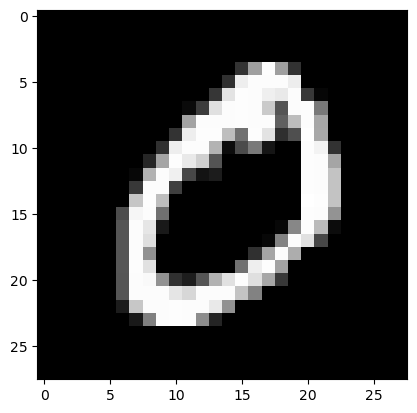

In [10]:
plt.imshow(train_image[1,:,:,0],cmap='gray')
plt.imsave("b_0.jpg", train_image[1,:,:,0],cmap="gray")
plt.show()

In [11]:
def lenet():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [12]:
model  = lenet()

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [14]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [15]:
history = model.fit(train_image, train_label, batch_size=1000, epochs=10 )

Epoch 1/10
60000/60000 [==============================] - 22s 373us/step - loss: 2.8333 - accuracy: 0.7338
Epoch 2/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.2330 - accuracy: 0.9338
Epoch 3/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.1388 - accuracy: 0.9595
Epoch 4/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0961 - accuracy: 0.9709
Epoch 5/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0710 - accuracy: 0.9787
Epoch 6/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.0556 - accuracy: 0.9831
Epoch 7/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0441 - accuracy: 0.9868
Epoch 8/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.0351 - accuracy: 0.9887
Epoch 9/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0284 - accuracy: 0.9916
Epoch 10/10
60000/60000 [============

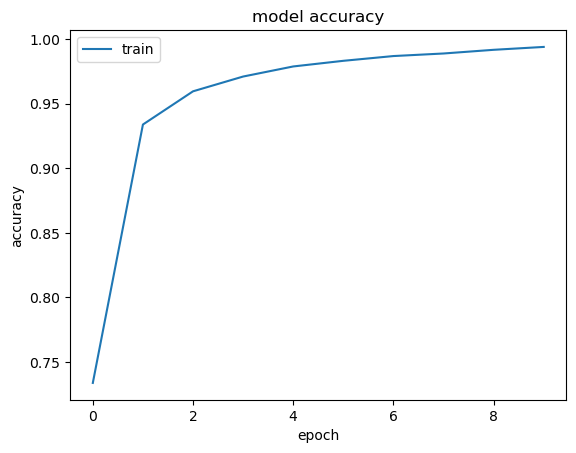

In [16]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

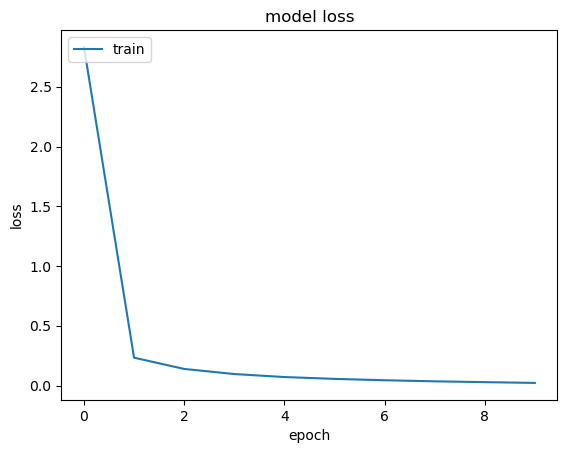

In [17]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
data_source = "MNIST Digit/Test"
data_temp = "MNIST/Test"
data_store = "MNIST/Test"

In [19]:
c_list = os.listdir(data_source)
print(c_list)

['t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [20]:
if os.path.isdir(data_temp):
    shutil.rmtree(data_temp)
    os.makedirs(data_temp)
else:
    os.makedirs(data_temp)

In [21]:
if os.path.isdir(data_store):
    shutil.rmtree(data_store)
    os.makedirs(data_store)
else:
    os.makedirs(data_store)

In [22]:
for c_l in c_list:
    with gzip.open(data_source+'/'+c_l, 'rb') as f_in:
        with open(data_temp+'/'+c_l[:(c_l.find('.gz'))], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [23]:
c_list = os.listdir(data_temp)
print(c_list)

['t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte']


In [24]:
test_image, test_label = loadlocal_mnist(images_path=data_temp+'/'+'t10k-images-idx3-ubyte', labels_path=data_temp+'/'+'t10k-labels-idx1-ubyte')

In [25]:
test_image=np.expand_dims(test_image, axis=2)
test_image = np.reshape(test_image, (-1,28,28))
test_image=np.expand_dims(test_image, axis=3)
print(test_image.shape)
y_or = test_label
test_label = onehot_encoder.transform(np.expand_dims(test_label,axis=1))
print(test_label.shape)

(10000, 28, 28, 1)
(10000, 10)


In [26]:
start = time.time()
print(model.evaluate(test_image,test_label))
end = time.time()
print(f"Runtime of the testing is {end - start}")

10000/10000 [==============================] - 3s 267us/step
[0.0597592210480303, 0.9828000068664551]
Runtime of the testing is 2.764639139175415


In [27]:
y = model.predict(test_image)
y_ob = np.argmax(y, axis=1)
no_cl = train_label.shape[1]

In [28]:
conf = confusion_matrix(y_or,y_ob)
print('confusion matrix')
print('________________\n')
print(conf)
print('_______________________________________________________\n')
print(classification_report(y_or,y_ob))
print('_______________________________________________________\n')
print("label     tp     fn     fp     tn   accuracy   precision   recall")
for label in range(no_cl):
    tp,fn,fp,tn = tp_f(label, conf.astype(float))
    print(f"{label+1:5d} {tp:6.0f} {fn:6.0f} {fp:6.0f} {tn:6.0f}   {accuracy_f(label, conf):8.3f}   {precision(label, conf):9.3f}   {recall(label, conf):6.3f}")
    
print('_______________________________________________________\n')    
acc=np.sum(np.diagonal(conf))/np.sum(conf)
print('Accuracy : {}'.format(acc))

confusion matrix
________________

[[ 973    0    1    0    0    0    3    1    2    0]
 [   0 1124    2    1    2    1    1    3    1    0]
 [   0    0 1019    3    1    0    1    6    2    0]
 [   0    0    1 1002    0    4    0    1    2    0]
 [   1    0    0    0  965    0    5    3    0    8]
 [   2    0    0   13    1  871    2    0    2    1]
 [   8    3    0    0    3    5  939    0    0    0]
 [   0    3    6    4    1    0    0 1010    1    3]
 [   6    1    3   10    3    1    2    2  944    2]
 [   3    0    0    6   10    2    0    4    3  981]]
_______________________________________________________

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       89